In [1]:
# dataset: banknotes.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# separate input and output data

x =df.drop('Class', axis = 1)

y = df['Class']

In [5]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

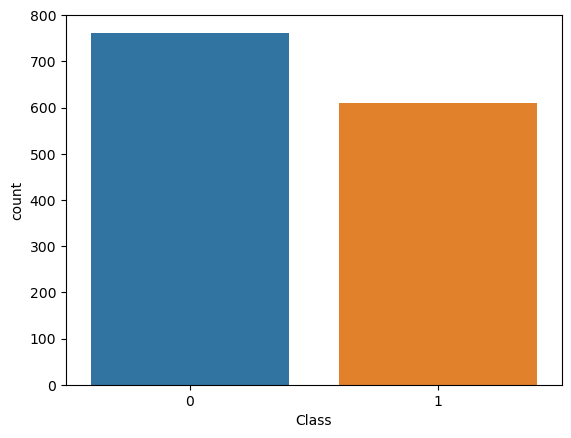

In [6]:
sns.countplot(x = y);

### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

### Build the model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(random_state= 0)

In [11]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluate

In [13]:
y_pred = dt.predict(x_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

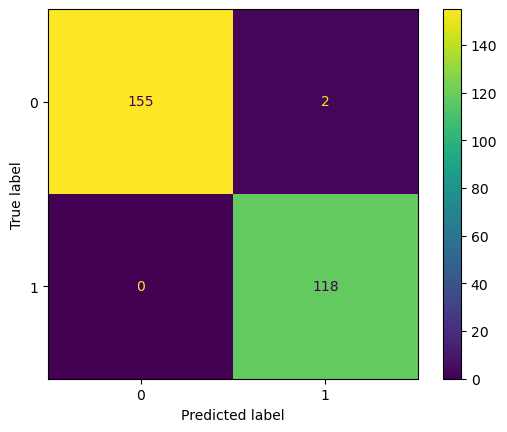

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9927272727272727

### plot the tree

In [20]:
from sklearn.tree import plot_tree

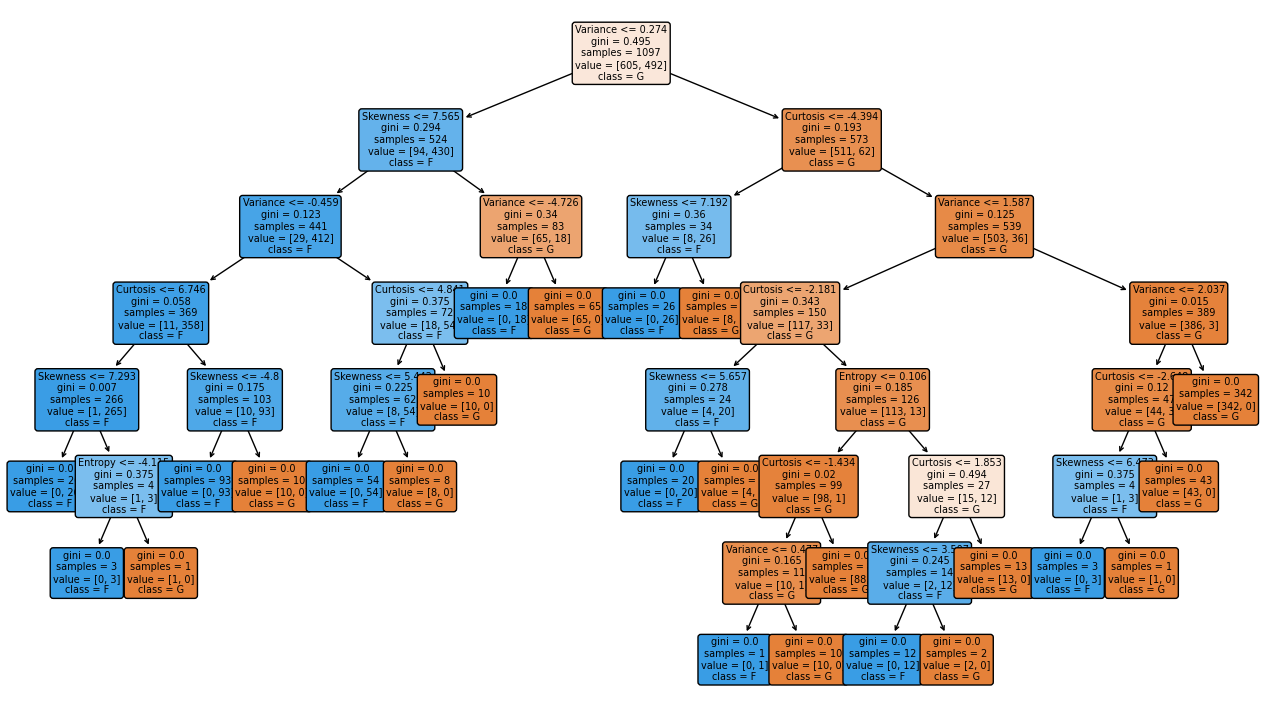

In [24]:
plt.figure(figsize=(16,9))

plot_tree(dt, fontsize= 7, rounded= True, filled= True,
         feature_names= x.columns, class_names= ['G', 'F']);

In [26]:
imp = dt.feature_importances_

In [27]:
imp

array([0.59661145, 0.23625864, 0.14961622, 0.01751369])

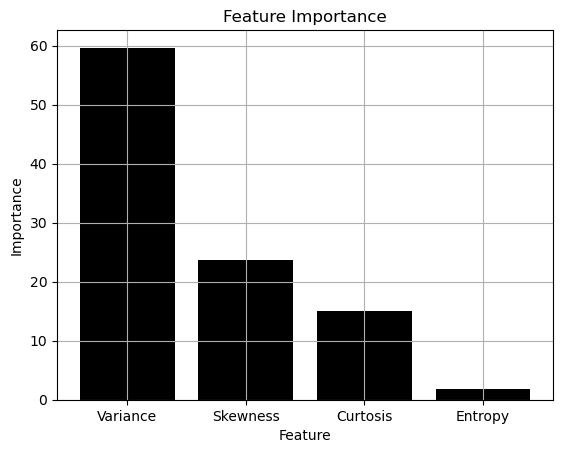

In [28]:
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(x.columns, imp * 100, color = 'black')
plt.grid();

### predict on new data

In [29]:
new1 = [[2.64160, 7.6461, -3.3073, -0.441]]

In [30]:
dt.predict(new1)

array([0])